# Simple Binary Classification

The purpose of this exercise is to study the binary classification problem, the idea is to use different methods to classify a given dataset.This time we are going to study the Sonar dataset. 

The Sonar Dataset involves the prediction of whether or not an object is a mine or a rock given the strength of sonar returns at different angles. It is a binary (2-class) classification problem. The number of observations for each class is not balanced. There are 208 observations with 60 input variables and 1 output variable. 

The CSV file contains 111 records of sonar signals dating over mines from different angles, it also contains 97 records of sonar signals dating over rocks under the same mine conditions.

In [1]:
#Load the data
using CSV
using DataFrames 
using StatsBase
using Statistics
using MLJ

df = DataFrame(CSV.File("C:/Users/maria/Desktop/Universidad/2022-I/Matemáticas para ML/Databases/sonar.csv"));

┌ Info: Precompiling MLJ [add582a8-e3ab-11e8-2d5e-e98b27df1bc7]
└ @ Base loading.jl:1423
  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** i

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** i

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** i

In [2]:
N = size(df, 2);
Y = Array((1:N));
rename!(df, fill(:Y, N), makeunique = true);

In [3]:
describe(df)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,Y,0.0292082,0.0015,0.0228,0.1371,,,Float64
2,Y_1,0.038443,0.0006,0.0308,0.2339,,,Float64
3,Y_2,0.0438372,0.0015,0.0342,0.3059,,,Float64
4,Y_3,0.0540527,0.0058,0.0441,0.4264,,,Float64
5,Y_4,0.0751048,0.0067,0.062,0.401,,,Float64
6,Y_5,0.104599,0.0102,0.0921,0.3823,,,Float64
7,Y_6,0.121591,0.0033,0.1056,0.3729,,,Float64
8,Y_7,0.134677,0.0055,0.1119,0.459,,,Float64
9,Y_8,0.177361,0.0075,0.1522,0.6828,,,Float64


In [4]:
#Outliers
function outl(dataf)
    count = 0;
    for i = 1:60
        μ = mean(df[:,i]);
        σ = std(df[:, i]);
        for j = 1:size(df,1)
            if abs((df[j,i]-μ)/σ) > 3
                df[j,i] = μ;
                count += 1
            end
        end
    end
    display(count)
end

outl(df)

112

In [5]:
#Cambio de variables a categóricas
df = coerce( df, :Y_60 => OrderedFactor)
levels!(df.Y_60, ["R","M"])
schema(select(df,:Y_60))

┌─────────┬──────────────────────────────────┬──────────────────┐
│ _.names │ _.types                          │ _.scitypes       │
├─────────┼──────────────────────────────────┼──────────────────┤
│ Y_60    │ CategoricalValue{String, UInt32} │ OrderedFactor{2} │
└─────────┴──────────────────────────────────┴──────────────────┘
_.nrows = 207


In [6]:
X = df[:, 1:60];
y = df[:, 61];

In [7]:
countmap(df.Y_60)

Dict{CategoricalValue{String, UInt32}, Int64} with 2 entries:
  "M" => 111
  "R" => 96

In [8]:
#Divisón entre Rocas y Minas

using StableRNGs


# Get rocks indices
rocks_idx = findall(==("R"), y)
# Get mines indices
mines_idx = findall(==("M"), y)


# Set a random seed
rng = StableRNG(0)

# Make a random partition over mines indices 
train_mines , tv_mines = partition(mines_idx , 0.6, shuffle = true, rng = rng)
validation_mines, test_mines = partition(tv_mines, 0.5, shuffle = true, rng = rng)

# Make a random partition over rocks indices 
train_rocks , tv_rocks = partition(rocks_idx , 0.6, shuffle = true, rng = rng)
validation_rocks, test_rocks = partition(tv_rocks, 0.5, shuffle = true, rng = rng)




# join mines and rocks (indices) for each set
train = [train_mines ; train_rocks];
validation = [validation_mines; validation_rocks];
test = [test_mines ; test_rocks];



#Size of the train and test data
println("Examples used for training:", size(df[train, :], 1))
println("Examples used for validation:", size(df[validation,:], 1))
println("Examples used for testing:", size(df[test, :], 1))

Examples used for training:125
Examples used for validation:41
Examples used for testing:41


In [9]:
#Standarization

scaler = StatsBase.fit( StatsBase.ZScoreTransform, Array(X[train,:]) , dims=1);
X_Scaled = StatsBase.transform(scaler, Array(X));

In [10]:
#PCA of train data

using MultivariateStats

M = MultivariateStats.fit(PCA, X_Scaled[train,:]'; pratio=0.9);
X̂ = MultivariateStats.transform(M, Array(X)')';

In [11]:
header = ["PC$i" for i = 1:23 ];
X̂ = DataFrame(Array(X̂), header)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,-1.32728,-0.85443,0.805034,1.30191,-0.224323,-0.528709,1.23331,-0.263144
2,-0.547396,-0.810641,1.06717,1.54012,-0.509502,-0.771933,1.25142,-0.415563
3,0.589965,-0.60084,0.856385,1.1283,-0.917044,-0.739667,0.663851,-0.29374
4,-0.374311,-0.381704,1.16346,1.06918,-0.208946,-0.865982,0.952045,-0.312979
5,-0.638584,-0.627784,0.787513,1.23714,-0.422266,-0.520116,1.15378,-0.270831
6,-0.309288,-0.436897,0.905064,1.4329,-1.09885,-1.03145,0.822551,-0.245647
7,-0.782614,-0.0659576,1.16085,1.31208,-0.917779,-0.851115,0.264327,-0.457401
8,-0.479812,0.0199896,1.05753,1.2453,-0.968609,-0.709696,0.376722,-0.72353
9,-0.252469,0.637072,1.37312,0.573697,-0.94113,-1.18482,0.603553,-0.537516


┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1423


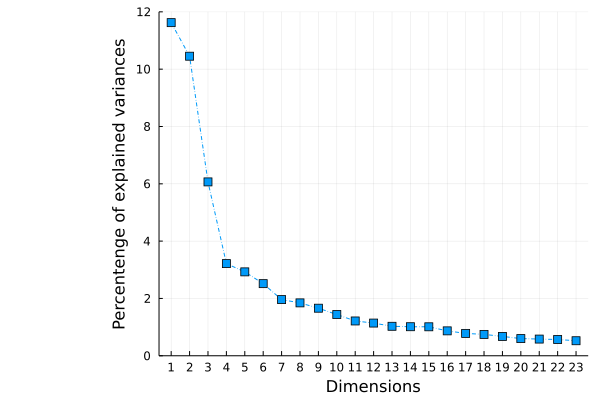

In [12]:
#Gráfica de la incidencia de la varianza de explicación
exp_var = MultivariateStats.eigvals(M::PCA)
using Plots
plot(1:23, exp_var, 
    xticks = (1:23, ["$i" for i = 1:23]),
    label = false,
    ylabel = "Percentenge of explained variances",
    xlabel = "Dimensions",
    ylims = (0,12),
    linestyle = :dashdot,
    markershape = :rect,
    legend= :outerleft,
    size(1, 2400)
)


In [13]:
#Matriz de covarianzas y análisis

cor(Array(X̂[:, 1:4]))

4×4 Matrix{Float64}:
  1.0        -0.164208   0.0076787  -0.0841445
 -0.164208    1.0        0.532088   -0.631843
  0.0076787   0.532088   1.0        -0.384338
 -0.0841445  -0.631843  -0.384338    1.0

In [14]:
#F1 Score function

function f1_function(prueba, predic)
    # Esta función nos retorna el promedio entre la exhaustividad (recall) y la precisión
    tam = length(prueba)
    VP, VN, FN, FP = 0, 0, 0, 0
    for i in 1:tam
        if( prueba[i] == predic[i] ) # Verdadero
            if( predic[i] == "M")
                VP+=1;
            else 
                VN+=1;
            end
        else                    # Falso
            if( predic[i] == "M")
                FP+=1
            else
                FN+=1
            end
        end
    end
    
    recall = VP/(VP + FN)
    precis = VP/(VP + FP)
    
    return 0.5*(recall + precis)
    
end

f1_function (generic function with 1 method)

In [15]:
X_t = [X̂[train,:]; X̂[validation, :]];
y_t = [y[train]; y[validation]];

In [16]:
#Logistic Regression

# Load the model from the ScikitLearn ecosystem
LogisticClassifier  = @load LogisticClassifier  pkg=ScikitLearn verbosity=0

logreg = LogisticClassifier()

LogisticClassifier(
    penalty = "l2",
    dual = false,
    tol = 0.0001,
    C = 1.0,
    fit_intercept = true,
    intercept_scaling = 1.0,
    class_weight = nothing,
    random_state = nothing,
    solver = "lbfgs",
    max_iter = 100,
    multi_class = "auto",
    verbose = 0,
    warm_start = false,
    n_jobs = nothing,
    l1_ratio = nothing) @679

In [17]:
r1= range( logreg, :C, lower = 0.001, upper = 10, scale=:log)
r2 = range( logreg, :penalty, values = ["l2", "none"])

self_tuning_log_model = TunedModel(model = logreg,
                                           resampling = Holdout(),
                                           tuning = Grid(resolution=10),
                                           range = [r1, r2]);

┌ Info: No measure specified. Setting measure=LogLoss{Float64} @816. 
└ @ MLJTuning C:\Users\maria\.julia\packages\MLJTuning\Uj5Cx\src\tuned_models.jl:230


In [18]:
mach = MLJ.machine(self_tuning_log_model, X_t, y_t);
MLJ.fit!(mach, verbosity = 0)

C:\Users\maria\.julia\conda\3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\maria\.julia\conda\3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\maria\.julia\conda\3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\maria\.julia\conda\3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs fa

Machine{ProbabilisticTunedModel{Grid,…},…} @366 trained 1 time; caches data
  args: 
    1:	Source @600 ⏎ `Table{AbstractVector{Continuous}}`
    2:	Source @558 ⏎ `AbstractVector{OrderedFactor{2}}`


In [19]:
fitted_params(mach).best_model

LogisticClassifier(
    penalty = "l2",
    dual = false,
    tol = 0.0001,
    C = 3.593813663804628,
    fit_intercept = true,
    intercept_scaling = 1.0,
    class_weight = nothing,
    random_state = nothing,
    solver = "lbfgs",
    max_iter = 100,
    multi_class = "auto",
    verbose = 0,
    warm_start = false,
    n_jobs = nothing,
    l1_ratio = nothing) @100

In [20]:
final_log = LogisticClassifier(C = 3.593813663804628, penalty = "l2")
match = machine(final_log, X̂, y)
MLJ.fit!(match, rows = [train; validation], verbosity = 0)
ŷ = MLJ.predict_mode(match, rows = test)
score = f1_function(ŷ, y[test])

0.8811188811188811

In [21]:
#Logistic regression hyperparameters

solvers = ["liblinear", "sag", "saga"]
C_values = [10.0, 1.0, 0.1, 0.01]
penaltys = ["l2", "none", "elasticnet"]


hyp_scores_log = []

for parameter in product(C_values, solvers, penaltys)
    logreg = LogisticClassifier(C = parameter[1], solver = parameter[2], penalty = parameter[3])
    mach = MLJ.machine(logreg, X̂, y)
    try
        MLJ.fit!(mach, rows = train, verbosity = 0)
        ŷ = MLJ.predict_mode(mach, rows = validation)
        score = f1_function(ŷ, y[validation])
        println("$parameter -----> score: $score")
        push!(hyp_scores_log, score => parameter)
    catch
        a = 0 
    end
   
end

LoadError: UndefVarError: product not defined

In [22]:
findmax(hyp_scores_log)

LoadError: ArgumentError: reducing over an empty collection is not allowed

In [23]:
Train = [train_mines ; train_rocks; validation_mines; validation_rocks];
logreg = LogisticClassifier(C = 0.1, solver = "liblinear", penalty = "l2")
mach = MLJ.machine(logreg, X̂, y)
MLJ.fit!(mach, rows = Train)
ŷ = MLJ.predict(mach, rows = test)

score = f1_function(ŷ, y[test])

┌ Info: Training Machine{LogisticClassifier,…} @344.
└ @ MLJBase C:\Users\maria\.julia\packages\MLJBase\hLtde\src\machines.jl:342


0.0

In [24]:
#Linear Regresion
using LIBSVM
Linear_SVC = @load LinearSVC verbosity=0

MLJLIBSVMInterface.LinearSVC

In [25]:
penalty = ["l1", "l2"]
c_values = 1:10
loss_lin = ["hinge", "squared_hinge"]

hyp_scores_lin = []
for parameter in product(penalty, c_values, loss_lin)
    linear = LinearSVC(penalty = parameter[1], C = parameter[2], loss = parameter[3])
    mach = machine(linear, X̂, y)
    try
        MLJ.fit!(mach, rows = train, verbosity = 0)
        ŷ = MLJ.predict_mode(mach, rows = validation)
        y_v = y[validation]
        score = f1_function(ŷ, y[validation])
        println("$solv -----> score: $score")
        push!(hyp_scores_lin, score => solv)
    catch
        a = 0
    end
    
end

LoadError: UndefVarError: product not defined

In [26]:
#SVM
SVC = @load SVC verbosity=0
svm_model= SVC()

SVC(
    kernel = LIBSVM.Kernel.RadialBasis,
    gamma = 0.0,
    weights = nothing,
    cost = 1.0,
    cachesize = 200.0,
    degree = 3,
    coef0 = 0.0,
    tolerance = 0.001,
    shrinking = true,
    probability = false) @858

In [27]:
ker = range(svm_model, :kernel, values = [LIBSVM.Kernel.Polynomial, LIBSVM.Kernel.Linear, LIBSVM.Kernel.Sigmoid, LIBSVM.Kernel.RadialBasis])
gam = range(svm_model, :gamma, lower = 0.1, upper = 10, scale=:log)
cos = range(svm_model, :cost, lower = 0.1, upper = 10, scale=:log)

self_tuning_svm_model = TunedModel(model = svm_model,
                                           resampling = Holdout(),
                                           tuning = Grid(resolution=10),
                                           range = [ker, gam, cos]);


┌ Info: No measure specified. Setting measure=MisclassificationRate @449. 
└ @ MLJTuning C:\Users\maria\.julia\packages\MLJTuning\Uj5Cx\src\tuned_models.jl:230


In [28]:
mach_svm = MLJ.machine(self_tuning_svm_model, X_t, y_t)
MLJ.fit!(mach_svm, verbosity = 0)

Machine{DeterministicTunedModel{Grid,…},…} @257 trained 1 time; caches data
  args: 
    1:	Source @292 ⏎ `Table{AbstractVector{Continuous}}`
    2:	Source @320 ⏎ `AbstractVector{OrderedFactor{2}}`


In [29]:
fitted_params(mach_svm).best_model

SVC(
    kernel = LIBSVM.Kernel.Polynomial,
    gamma = 0.7742636826811272,
    weights = nothing,
    cost = 0.1668100537200059,
    cachesize = 200.0,
    degree = 3,
    coef0 = 0.0,
    tolerance = 0.001,
    shrinking = true,
    probability = false) @926

In [30]:
#SVM Hyperparameters
using LIBSVM
kernels = [LIBSVM.Kernel.Polynomial, LIBSVM.Kernel.Linear, LIBSVM.Kernel.Sigmoid]
gamma = 0.0:10.0
cost = 0.1:10.0

hyp_scores_svm = []
for parameter in product(kernels, gamma, cost)
    instance = SVC(kernel = parameter[1], gamma = float(parameter[2]), cost = float(parameter[3]))
    mach = machine(instance, X̂, y)
    MLJ.fit!(mach, rows = train, verbosity = 0)
    ŷ = MLJ.predict(mach, rows = validation)
    score = f1_function(ŷ, y[validation])
    println("$parameter -----> score: $score")
    
    push!(hyp_scores_svm, score => parameter)
    
end

LoadError: UndefVarError: product not defined

In [31]:
hyp_scores_svm

Any[]

In [32]:
findmax(hyp_scores_svm)

LoadError: ArgumentError: reducing over an empty collection is not allowed

In [33]:
Train = [train_mines ; train_rocks; validation_mines; validation_rocks];
instance = SVC(kernel = LIBSVM.Kernel.Linear, gamma = 10.0, cost = 1.1);
svc_model = machine(instance, X̂, y)
mach = MLJ.fit!(svc_model, rows = Train)
ŷ = MLJ.predict(mach, rows = test)

score = f1_function(ŷ, y[test])

┌ Info: Training Machine{SVC,…} @568.
└ @ MLJBase C:\Users\maria\.julia\packages\MLJBase\hLtde\src\machines.jl:342


0.8811188811188811

There exists different ways to handle the Class Imbalance. A quite simple but popular strategy that works for data containers, is to either under- or over-sample it according to the class distribution. What that means is that the data container is re-sampled in such a way, that the class distribution in the resulting data container is approximately uniform.

For this exercise we are going to work with oversampling, this approach generates a re-balanced version of data by repeatedly sampling existing observations in such a way that every class will have at least fraction times the number observations of the largest class.

One consequence of oversampling is that it can overfit the model, let's see how it works.

In [34]:
#KNN
KNN = @load KNeighborsClassifier  verbosity=0

knn_model = KNN()

KNeighborsClassifier(
    n_neighbors = 5,
    weights = "uniform",
    algorithm = "auto",
    leaf_size = 30,
    p = 2,
    metric = "minkowski",
    metric_params = nothing,
    n_jobs = nothing) @434

In [35]:
k = range(knn_model, :n_neighbors, lower=1, upper=21)
metrics = range(knn_model, :metric, values=["euclidean", "manhattan", "minkowski"])
weights_values = range(knn_model, :weights, values=["uniform", "distance"])

self_tunning_knn = TunedModel(model=knn_model, 
                                    resampling=Holdout(), 
                                    tuning=Grid(),
                                    range=[k, metrics, weights_values]);

┌ Info: No measure specified. Setting measure=LogLoss{Float64} @816. 
└ @ MLJTuning C:\Users\maria\.julia\packages\MLJTuning\Uj5Cx\src\tuned_models.jl:230


In [36]:
mach_knn = MLJ.machine(self_tunning_knn, X_t,y_t)
MLJ.fit!(mach_knn, verbosity = 0)

Machine{ProbabilisticTunedModel{Grid,…},…} @442 trained 1 time; caches data
  args: 
    1:	Source @169 ⏎ `Table{AbstractVector{Continuous}}`
    2:	Source @664 ⏎ `AbstractVector{OrderedFactor{2}}`


In [37]:
fitted_params(mach_knn).best_model

KNeighborsClassifier(
    n_neighbors = 8,
    weights = "distance",
    algorithm = "auto",
    leaf_size = 30,
    p = 2,
    metric = "euclidean",
    metric_params = nothing,
    n_jobs = nothing) @416

In [39]:
DecisionTreeClassifier = @load DecisionTreeClassifier pkg=DecisionTree  verbosity=0

┌ Info: Precompiling MLJDecisionTreeInterface [c6f25543-311c-4c74-83dc-3ea6d1015661]
└ @ Base loading.jl:1423
ERROR: LoadError: UndefVarError: ScientificTypesBase not defined
Stacktrace:
 [1] include
   @ .\Base.jl:418 [inlined]
 [2] include_package_for_output(pkg::Base.PkgId, input::String, depot_path::Vector{String}, dl_load_path::Vector{String}, load_path::Vector{String}, concrete_deps::Vector{Pair{Base.PkgId, UInt64}}, source::Nothing)
   @ Base .\loading.jl:1318
 [3] top-level scope
   @ none:1
 [4] eval
   @ .\boot.jl:373 [inlined]
 [5] eval(x::Expr)
   @ Base.MainInclude .\client.jl:453
 [6] top-level scope
   @ none:1
in expression starting at C:\Users\maria\.julia\packages\MLJDecisionTreeInterface\Wf8wO\src\MLJDecisionTreeInterface.jl:1


LoadError: Failed to precompile MLJDecisionTreeInterface [c6f25543-311c-4c74-83dc-3ea6d1015661] to C:\Users\maria\.julia\compiled\v1.7\MLJDecisionTreeInterface\jl_5415.tmp.